# Auditory Perceptual Framing Analysis Script (2021). Pitch discrimination task.
## Pupil info extract

# Load data participants


In [39]:
# Select participants
#select_subj = [2] 
#choiceNameFrames = list()

#for i in np.arange(len(select_subj)):
choiceNameFrames1 = glob.glob('/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pupil data/eyeData_pilots_1.txt')

In [40]:
choiceNameFrames1

['/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pupil data/eyeData_pilots_1.txt']

In [41]:
# replace elements in txt to allow separation to dataframe
f1 = open(choiceNameFrames1[0], 'r')
f2 = open('/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pupil data//eye_info_report_fix.txt', 'w')
for line in f1:
    if line.find('TRACKER_TIME')>-1:
        #remove lines that cause trouble for inclusion in dataframe later
        print('REMOVED LINE')
        print(line)
    else:
        f2.write(line.replace('!MODE RECORD CR 500 2 1 R', '!MODE_RECORD_CR_500_2_1_R'))

f1.close()
f2.close()

REMOVED LINE
pilot1	5	1275.00	TRACKER_TIME 2 1618336.607;SLIDER_KEYB_R	1618335.00	1606851

REMOVED LINE
pilot1	16	.	TRACKER_TIME 4 1791485.814;SND_CHOICE;STORE_SNDCHOICE_R	1791485.00	1786697

REMOVED LINE
pilot1	31	970.00	TRACKER_TIME 7 2011538.750	2011538.00	2004790

REMOVED LINE
pilot1	37	801.00	TRACKER_TIME 8 2072853.832	2072854.00	2065914

REMOVED LINE
pilot1	42	500.00	TRACKER_TIME 9 2134852.438	2134852.00	2126448

REMOVED LINE
pilot1	48	756.00	TRACKER_TIME 10 2195561.568;TIMER_SND	2195560.00	2192494

REMOVED LINE
pilot1	54	620.00	TRACKER_TIME 11 2255565.721	2255566.00	2255478

REMOVED LINE
pilot1	59	1219.00	TRACKER_TIME 12 2315952.085;SND_CHOICE;STORE_SNDCHOICE_R	2315952.00	2310646

REMOVED LINE
pilot1	64	1154.00	TRACKER_TIME 13 2377963.358	2377962.00	2371290

REMOVED LINE
pilot1	71	1175.00	TRACKER_TIME 16 2626240.947	2626241.00	2618131

REMOVED LINE
pilot1	77	983.00	TRACKER_TIME 17 2687106.220	2687105.00	2685005

REMOVED LINE
pilot1	83	1266.00	TRACKER_TIME 18 2748854.714	2748853.

In [42]:
pupilDF1 = glob.glob('/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pupil data/eye_info_report_fix.txt')
pupilInfo = pd.read_csv(pupilDF1[0],delim_whitespace=True) 

# reject participants 

In [44]:
#rej_part = ['pilot3']
#rej_part = ['Pilot2','pilot3','pilot5']
rej_part = []


In [45]:
for j in rej_part:
    pupilInfo = pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL'] !=  j)]

In [46]:
pupilInfo

,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME
0,pilot1,1,1887.00,!MODE_RECORD_CR_500_2_1_R,1560195.0,1560195
1,pilot1,1,1890.00,.,1560197.0,1560195
2,pilot1,1,1890.00,.,1560199.0,1560195
3,pilot1,1,1876.00,.,1560201.0,1560195
4,pilot1,1,1865.00,.,1560203.0,1560195
...,...,...,...,...,...,...
853075,pilot1,200,1299.00,.,4631217.0,4622251
853076,pilot1,200,1298.00,.,4631219.0,4622251
853077,pilot1,200,1295.00,.,4631221.0,4622251
853078,pilot1,200,1295.00,.,4631223.0,4622251


## sort participants within dataframe

In [47]:
pupilInfo = pupilInfo.sort_values(by=['RECORDING_SESSION_LABEL', 'TRIAL_INDEX','TIMESTAMP'])
pupilInfo = pupilInfo.reset_index()

In [48]:
pupilInfo

,index,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME
0,0,pilot1,1,1887.00,!MODE_RECORD_CR_500_2_1_R,1560195.0,1560195
1,1,pilot1,1,1890.00,.,1560197.0,1560195
2,2,pilot1,1,1890.00,.,1560199.0,1560195
3,3,pilot1,1,1876.00,.,1560201.0,1560195
4,4,pilot1,1,1865.00,.,1560203.0,1560195
...,...,...,...,...,...,...,...
853075,853075,pilot1,200,1299.00,.,4631217.0,4622251
853076,853076,pilot1,200,1298.00,.,4631219.0,4622251
853077,853077,pilot1,200,1295.00,.,4631221.0,4622251
853078,853078,pilot1,200,1295.00,.,4631223.0,4622251


In [49]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['pilot1'], dtype=object)

In [50]:
pupilInfo.loc[(pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot1')].TRIAL_INDEX.unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [51]:
pupilInfo.RECORDING_SESSION_LABEL.unique()

array(['pilot1'], dtype=object)

## remove practice trials (for pilots) (pilot2 has 12 practice trials; Pilot3  has 20 practice trials) 

In [52]:
pupilInfo = pupilInfo.loc[pupilInfo['TRIAL_INDEX']>20] 
#pupilInfo = pupilInfo.loc[((pupilInfo['TRIAL_INDEX']>20) & ((pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot4') | (pupilInfo['RECORDING_SESSION_LABEL']  == 'pilot5')))  | (pupilInfo['RECORDING_SESSION_LABEL']  == 'Pilot2')] 

pupilInfo = pupilInfo.reset_index()

In [53]:
len(pupilInfo.TRIAL_INDEX.unique())

180

## Extract  pupil info surrounding event

In [54]:
firstSndDF = pupilInfo.loc[ (pupilInfo['SAMPLE_MESSAGE'] == 'FIRST_SOUND_R')]
choiceDF = pupilInfo.loc[(pupilInfo['SAMPLE_MESSAGE'] == 'DISPLAY_FEEDBACK_R') | (pupilInfo['SAMPLE_MESSAGE'] == 'DISPLAY_FEEDBACK_L')]
itiDF = pupilInfo.loc[(pupilInfo['SAMPLE_MESSAGE'] == 'ITI_APPEAR')]
sliderAcceptDF = pupilInfo.loc[(pupilInfo['SAMPLE_MESSAGE'] == 'SLIDER_KEYB_ACCEPT')]

In [55]:
firstSndDF.index

Int64Index([  1053,   5641,   9739,  14298,  18795,  22848,  27521,  31518,
             36548,  40960,
            ...
            721345, 725079, 728501, 732159, 735709, 739187, 743124, 746696,
            751105, 754665],
           dtype='int64', length=180)

In [56]:
pupilInfo

,level_0,index,RECORDING_SESSION_LABEL,TRIAL_INDEX,RIGHT_PUPIL_SIZE,SAMPLE_MESSAGE,TIMESTAMP,IP_START_TIME
0,94975,94975,pilot1,21,1145.00,!MODE_RECORD_CR_500_2_1_R,1897602.0,1897602
1,94976,94976,pilot1,21,1141.00,.,1897604.0,1897602
2,94977,94977,pilot1,21,1144.00,.,1897606.0,1897602
3,94978,94978,pilot1,21,1149.00,.,1897608.0,1897602
4,94979,94979,pilot1,21,1151.00,.,1897610.0,1897602
...,...,...,...,...,...,...,...,...
758100,853075,853075,pilot1,200,1299.00,.,4631217.0,4622251
758101,853076,853076,pilot1,200,1298.00,.,4631219.0,4622251
758102,853077,853077,pilot1,200,1295.00,.,4631221.0,4622251
758103,853078,853078,pilot1,200,1295.00,.,4631223.0,4622251


# Calculate the average pupil diameter 1 sec and divide to obtain the relative pupul variation

remember that the sampling time was 500hz, so we have 2ms between samples

In [57]:
pupilBaseline = []
for i in firstSndDF.index:
    pupilBaseline.append(pupilInfo.iloc[i-1000:i-1].RIGHT_PUPIL_SIZE.values)
    
baseP = [None]*len(pupilBaseline)
for j in range(len(pupilBaseline)):
    pupilSeq1S = [None]*len(pupilBaseline[j])
    for jj in range(len(pupilBaseline[j])):
        if pupilBaseline[j][jj]=='.':
            pupilSeq1S[jj]=np.nan
        else:
            pupilSeq1S[jj] = float(pupilBaseline[j][jj])
    baseP[j] = np.nanmean(pupilSeq1S) # baseP contains the value of pupil for the baseline of each trial


remember that the sampling time was 500hz, so we have 2ms between samples , so we need to consider that i,i+1 corresponds to skip of 2 miliseconds/

In [58]:
pupilFirstSnd = []
pupilChoice = []
pupilIti = []
pupilSlider = []

for i in firstSndDF.index:
    pupilFirstSnd.append(pupilInfo.iloc[i-500:i+500].RIGHT_PUPIL_SIZE.values)
    
for i in choiceDF.index:
    pupilChoice.append(pupilInfo.iloc[i-500:i+500].RIGHT_PUPIL_SIZE.values)
    
for i in itiDF.index:
    pupilIti.append(pupilInfo.iloc[i-10:i+1000].RIGHT_PUPIL_SIZE.values)    

for i in sliderAcceptDF.index:
    pupilSlider.append(pupilInfo.iloc[i-1000:i+10].RIGHT_PUPIL_SIZE.values)    # if increase more than 10 you can start reading outside the list 
    

In [59]:
def show_raw_pupil(pupilBase,event_time, baseP, title = ""):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')
    
    
    base = [None]*len(pupilBase)
    for j in range(len(pupilBase)):
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base[j] = pupilSeq1S/baseP[j]
    base = np.asarray(base)
    baseTimeMean =np.nanmean(base, axis= 0)
    baseTimeStd =np.nanstd(base, axis= 0)
    
    figsize(6, 5)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    labFrame = ['Pupil','']
    xSecs = np.array(range(0,len(baseTimeMean)))
    
    plt.errorbar(xSecs,baseTimeMean, yerr= baseTimeStd, color=colorP[0],marker='', alpha = 0.2 );
    plot(xSecs,baseTimeMean,color=colorP[0],label = labFrame[0],ls = '--')
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples [2ms]",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

In [60]:
## ## Calcualte error
## plot(xSecs,instantEffectCorr_dislike.param,color=colorP[1],label = labFrame[1],ls = '--')
## 
## #m = len(instantEffectCorr_like.p) # number of hypothesis tested (for multiple comparison bonferroni correction)
## 
## # FDR correction 0.01 (instead of bonferroni)
## _,p_value_like_fdr,_,_ = statsmodels.stats.multitest.multipletests(instantEffectCorr_like.p_value, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)
## _,p_value_dislike_fdr,_,_ = statsmodels.stats.multitest.multipletests(instantEffectCorr_dislike.p_value, alpha=0.01, method='fdr_bh', is_sorted=False, returnsorted=False)
## 
## 
## # for most case
## #for ii in range(len(instantEffectCorr_like.p_value)):
## #    if instantEffectCorr_like.p_value[ii]<0.01/m:
## clusterSize = 6
## 
## for ii in range(len(p_value_like_fdr)):
##     # count the number of significant value in the cluster, if over 6 then the cluster is significant 
##     if np.sum(p_value_like_fdr[ii-clusterSize:ii]<0.01) == clusterSize:
##             plt.plot(xSecs[ii-clusterSize:ii], [np.max(instantEffectCorr_like.param)+0.025]*clusterSize, color=colorP[0],linewidth=4,solid_capstyle = 'butt')
## 
## for ii in range(len(p_value_dislike_fdr)):
##     # count the number of significant value in the cluster, if over 6 then the cluster is significant 
##     if np.sum(p_value_dislike_fdr[ii-clusterSize:ii]<0.01) == clusterSize:
##             plt.plot(xSecs[ii-clusterSize:ii], [np.min(instantEffectCorr_dislike.param)-0.025]*clusterSize, color=colorP[1],linewidth=4,solid_capstyle = 'butt')



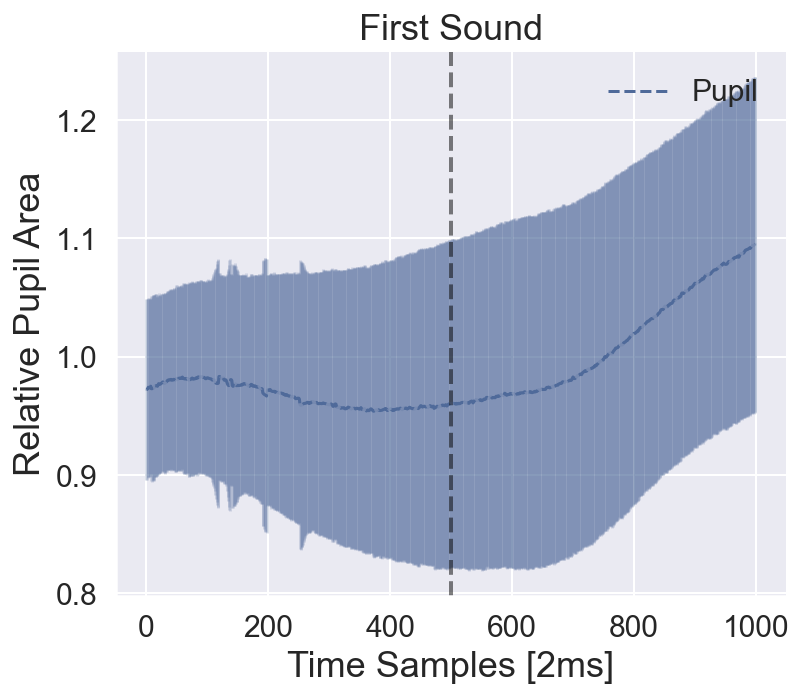

In [61]:
show_raw_pupil(pupilFirstSnd,500,baseP, title = 'First Sound')

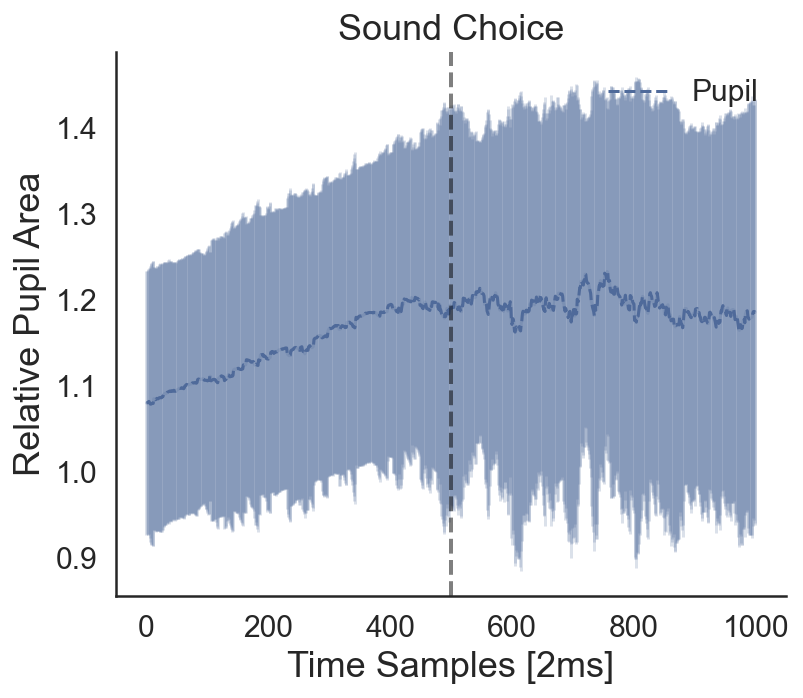

In [63]:
show_raw_pupil(pupilChoice,500,baseP, title = 'Sound Choice') # we add -10 becuase we use "feedback" event with happens 20ms after actual choice 

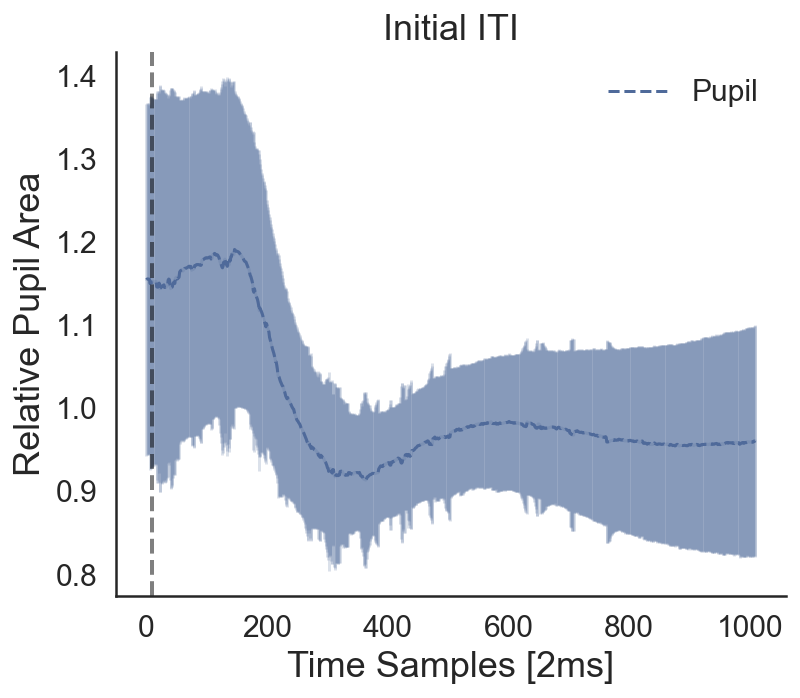

In [64]:
show_raw_pupil(pupilIti,10,baseP, title = 'Initial ITI')

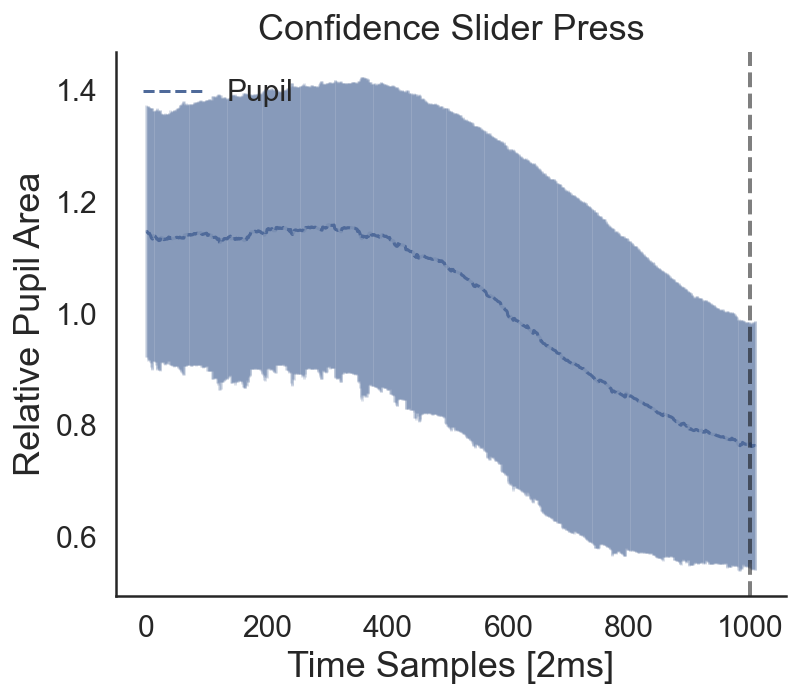

In [65]:
show_raw_pupil(pupilSlider,1000,baseP, title= 'Confidence Slider Press') 

# Load choice info

In [72]:
# Select participants
select_subj = [1] 

choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot'+str(select_subj[i])+'/RESULTS_FILE.txt')
    
    choiceNameFrames1.sort()
    
    choiceNameFrames.extend(choiceNameFrames1)


In [73]:
choiceNameFrames

['/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot1/RESULTS_FILE.txt']

## Join dataframes 

In [74]:
partic_num=len(choiceNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameAll = pd.DataFrame( )

for j in range (partic_num):
    choiceFrames = pd.read_csv(choiceNameFrames[j],delim_whitespace=True) 

    # add participant name column
    partNamesChoice = [int(j)]*len(choiceFrames)
    #sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    choiceFrames['part'] = partNamesChoice 
    
    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)


In [75]:
choiceNameFrames

['/Users/pradyumna/Google Drive/BdM Projects/pupilPEB2021/Pilots Clicks/pilot1/RESULTS_FILE.txt']

## Normalize (z-score) values

In [76]:
choiceFrameAll["zRT"] = z_score1(choiceFrameAll,'part',"Choice_SND1_RT")
choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zConf"] = z_score1(choiceFrameAll,'part',"CONF")

choiceFrameAll["zLFreq"] = z_score1(choiceFrameAll,'part',"freql")
choiceFrameAll["zRFreq"] = z_score1(choiceFrameAll,'part',"freqr")

choiceFrameAll["Choice"] = (choiceFrameAll['Choice_SND1'] == 'm')*1 + (choiceFrameAll['Choice_SND1'] == 'z')*0

## Include new variables

In [77]:
choiceFrameAll["totFreq"] = choiceFrameAll['freql'] + choiceFrameAll['freqr'] 
choiceFrameAll["dFreq"] =  - choiceFrameAll['freql'] +  choiceFrameAll['freqr'] 
choiceFrameAll["absDFreq"] =  np.abs(- choiceFrameAll['freql'] +  choiceFrameAll['freqr'] )

choiceFrameAll["zTotFreq"] = z_score1(choiceFrameAll,'part',"totFreq")
choiceFrameAll["zDFreq"] = z_score1(choiceFrameAll,'part',"dFreq")
choiceFrameAll["zAbsDFreq"] = z_score1(choiceFrameAll,'part',"absDFreq")


choiceFrameAll["choFreq"] =  ((choiceFrameAll["Choice"] == 0) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 1) *choiceFrameAll['freqr'] )
choiceFrameAll["unchoFreq"] =  ((choiceFrameAll["Choice"] == 1) * choiceFrameAll['freql']) +  ((choiceFrameAll["Choice"] == 0) *choiceFrameAll['freqr'] )

choiceFrameAll["zChoFreq"] = z_score1(choiceFrameAll,'part',"choFreq")
choiceFrameAll["zUnchoFreq"] = z_score1(choiceFrameAll,'part',"unchoFreq")

## split data : by confidence

In [78]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['ConfSplit'],Splits_variables = ['zConf'])
choiceFrameAll['ConfSplit'] = data_splits['ConfSplit'].values

## split data : by Totfreq and DFreq

In [79]:
data_splits = splitBy(choiceFrameAll, Splits_headers = ['TotFreqSplit'],Splits_variables = ['zTotFreq'])
choiceFrameAll['TotFreqSplit'] = data_splits['TotFreqSplit'].values

data_splits = splitBy(choiceFrameAll, Splits_headers = ['DFreqSplit'],Splits_variables = ['zDFreq'])
choiceFrameAll['DFreqSplit'] = data_splits['DFreqSplit'].values


In [80]:
choiceFrameAll

,Session_Name_,Trial_Index_,expcond,trialn,noisecond,whichfirstopt,noiseinl,noiseinr,freql,freqr,...,zTotFreq,zDFreq,zAbsDFreq,choFreq,unchoFreq,zChoFreq,zUnchoFreq,ConfSplit,TotFreqSplit,DFreqSplit
0,pilot1,21,Experiment,118,1,0,1,1,4,1,...,-1.566699,-0.700649,-0.301511,1,4,-1.565104,-0.504956,0.0,0.0,0.0
1,pilot1,22,Experiment,134,1,0,1,1,5,9,...,0.783349,0.934199,0.150756,5,9,-0.197537,1.270279,0.0,1.0,1.0
2,pilot1,23,Experiment,140,1,0,1,1,6,5,...,0.000000,-0.233550,-1.206045,5,6,-0.197537,0.205138,0.0,0.0,0.0
3,pilot1,24,Experiment,177,1,0,1,1,10,6,...,1.305582,-0.934199,0.150756,6,10,0.144354,1.625326,0.0,1.0,0.0
4,pilot1,25,Experiment,107,1,0,1,1,2,9,...,0.000000,1.634848,1.507557,2,9,-1.223212,1.270279,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,pilot1,196,Experiment,32,1,0,1,1,4,6,...,-0.261116,0.467099,-0.753778,6,4,0.144354,-0.504956,1.0,0.0,1.0
176,pilot1,197,Experiment,43,1,0,1,1,5,8,...,0.522233,0.700649,-0.301511,8,5,0.828137,-0.149909,1.0,1.0,1.0
177,pilot1,198,Experiment,1,1,0,1,1,1,2,...,-2.088932,0.233550,-1.206045,2,1,-1.223212,-1.570096,0.0,0.0,1.0
178,pilot1,199,Experiment,12,1,0,1,1,2,4,...,-1.305582,0.467099,-0.753778,4,2,-0.539429,-1.215049,0.0,0.0,1.0


In [81]:
choiceFrameAll.Session_Name_.unique()

array(['pilot1'], dtype=object)

In [82]:
#data_expHigh = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] # 1 = high, 2 = low
#data_expLow = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] # 1 = high, 2 = low

# Pick for confidence levels across both frames
data_expHigh = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 1)] 
data_expLow = choiceFrameAll.loc[(choiceFrameAll['ConfSplit'] == 0)] 

In [83]:
len(pupilFirstSnd)

180

In [84]:
def show_raw_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = ""):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    data_expHigh = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll.loc[(choiceFrameAll[splitVar] == 0)] #
    
    index_high = data_expHigh.TRIAL_N_LIVE.values-1
    index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S/baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =np.nanstd(base1, axis= 0)
    
    figsize(6, 5)
    
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S/baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =np.nanstd(base2, axis= 0)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    plt.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-')
    #plot low    
    plt.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[1],marker='', alpha = 0.05 );
    plot(xSecs,baseTimeMean2,color=colorP[1],label = labFrame[1],ls = '-')
    
    plt.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    plt.title(title,size=18)
    plt.xlabel("Time Samples [2ms]",size=18)
    plt.ylabel("Relative Pupil Area",size=18)
    plt.xticks(fontsize= 15)
    plt.yticks(fontsize= 15)
    
    plt.legend(frameon=False, fontsize = 15)
    sns.set_style("white")
    sns.despine()

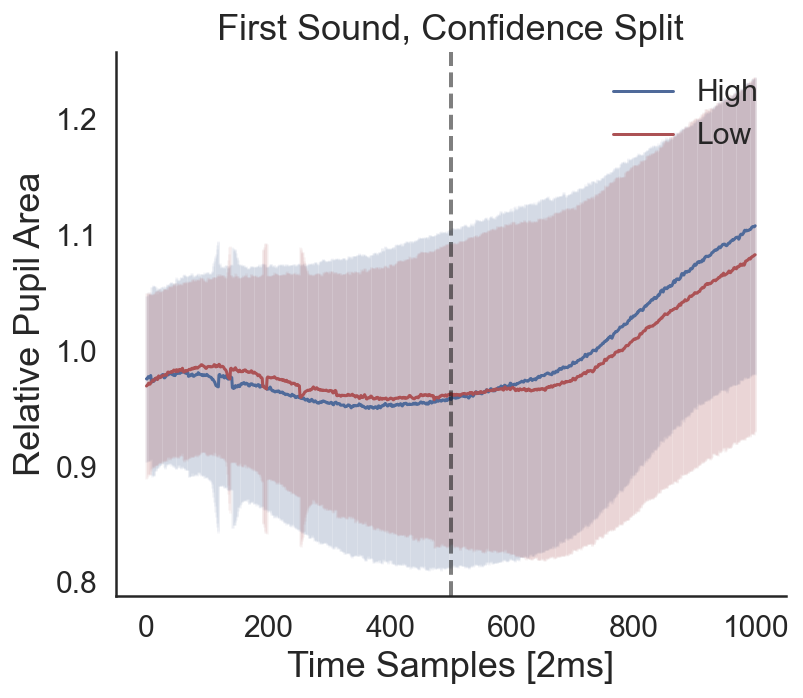

In [88]:
show_raw_pupil_split(pupilFirstSnd,500,choiceFrameAll,baseP,'TotFreqSplit',title = 'First Sound, Confidence Split')

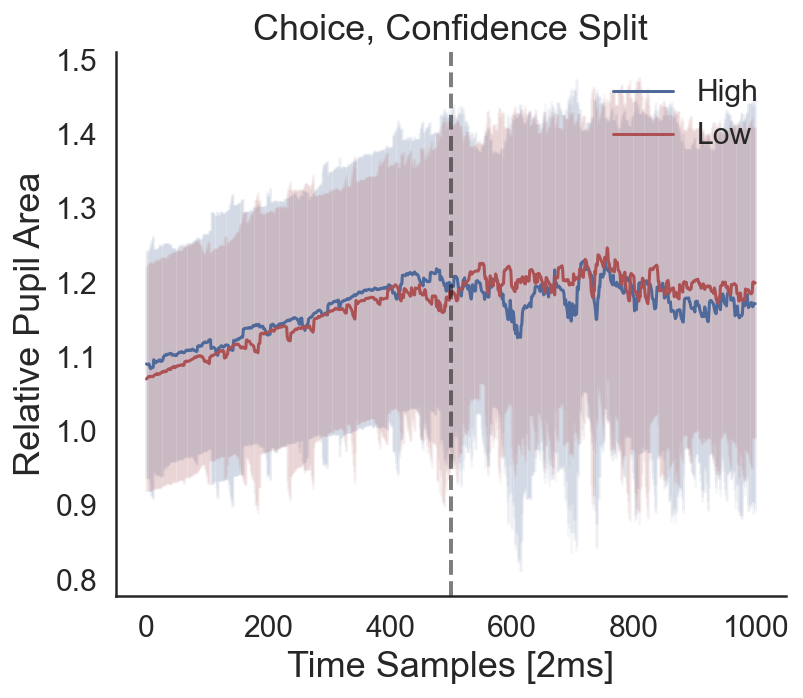

In [89]:
show_raw_pupil_split(pupilChoice,500,choiceFrameAll,baseP,'TotFreqSplit',title = 'Choice, Confidence Split')

# Checking relative change in pupil size separating by frame

# Separate by frame

In [99]:

def show_frame_pupil_split(pupilBase,event_time,choiceFrameAll,baseP, splitVar = 'ConfSplit', title = "", labFrame = ['High','Low']):
    
    # check if the size (number of trials) of pupil info and baseline pupil is the same
    if len(pupilBase) != len(baseP):
        print('pupil baseline and pupil trials have not the same number of trials. Beware!')    
    if len(choiceFrameAll) != len(baseP):
        print('behaviour trials and pupil trials have not the same number of trials. Beware!')      
    
    
    # initialize figure
    
    figsize(12, 5)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    #############################################
    ### Pick for the data for the FIRST FRAME ###
    #############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 1)] 
    
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    index_high = data_expHigh.TRIAL_N_LIVE.values-1
    index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S/baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =np.nanstd(base1, axis= 0)
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S/baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =np.nanstd(base2, axis= 0)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax1.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.05 );
    ax1.plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-')
    #plot low    
    ax1.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[1],marker='', alpha = 0.05 );
    ax1.plot(xSecs,baseTimeMean2,color=colorP[1],label = labFrame[1],ls = '-')
    
    ax1.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax1.set(xlabel = "Time Samples [2ms]",ylabel = "Relative Pupil Area")
  #  ax1.xticks(fontsize= 15)
  #  ax1.yticks(fontsize= 15)
    
    ax1.legend(frameon=False, fontsize = 15)
    ax1.set_title("More Clicks Frame", fontsize = 18)
    ##############################################
    ### Pick for the data for the SECOND FRAME ###
    ##############################################
    
    choiceFrameAll0 = choiceFrameAll.loc[(choiceFrameAll['frame'] == 2)] 
    
    data_expHigh = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 1)] # 1 = high, 0 = low
    data_expLow = choiceFrameAll0.loc[(choiceFrameAll0[splitVar] == 0)] #
    
    index_high = data_expHigh.TRIAL_N_LIVE.values-1
    index_low = data_expLow.TRIAL_N_LIVE.values-1
    
    # extract high
    base1 = [None]*len(index_high)
    idxx= 0 
    for j in index_high:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base1[idxx] = pupilSeq1S/baseP[j]
        idxx=idxx+1
    base1 = np.asarray(base1)
    baseTimeMean1 =np.nanmean(base1, axis= 0)
    baseTimeStd1 =np.nanstd(base1, axis= 0)
    
    # extract low    
    base2 = [None]*len(index_low)
    idxx= 0 
    for j in index_low:
        pupilSeq1S = [None]*len(pupilBase[j])
        for jj in range(len(pupilBase[j])):
            if pupilBase[j][jj]=='.':
                pupilSeq1S[jj]=np.nan
            else:
                pupilSeq1S[jj] = float(pupilBase[j][jj])
        base2[idxx] = pupilSeq1S/baseP[j]
        idxx=idxx+1
    base2 = np.asarray(base2)
    baseTimeMean2 =np.nanmean(base2, axis= 0)
    baseTimeStd2 =np.nanstd(base2, axis= 0)
    
    #xsecs = range(0,len(instantEffectDDT_like))
    colorP = ['#4F6A9A','#AC5255','#B5C8E9','#F2CECF']
    #labFrame = ['High','Low']
    xSecs = np.array(range(0,len(baseTimeMean1)))
    
    #plot High
    ax2.errorbar(xSecs,baseTimeMean1, yerr= baseTimeStd1, color=colorP[0],marker='', alpha = 0.05 );
    ax2.plot(xSecs,baseTimeMean1,color=colorP[0],label = labFrame[0],ls = '-')
    #plot low    
    ax2.errorbar(xSecs,baseTimeMean2, yerr= baseTimeStd2, color=colorP[1],marker='', alpha = 0.05 );
    ax2.plot(xSecs,baseTimeMean2,color=colorP[1],label = labFrame[1],ls = '-')
    
    ax2.axvline(event_time, color='black', lw=2, alpha=0.5,ls = '--')

    ax2.set(xlabel = "Time Samples [2ms]")
   # ax2.xticks(fontsize= 15)
   # ax2.yticks(fontsize= 15)
    
    ax2.legend(frameon=False, fontsize = 15)
    ax2.set_title("Less Clicks Frame",fontsize = 18)

    
    
    
    
    plt.suptitle(title,size=18)

    sns.set_style("white")
    sns.despine()


## split by TotFreq 

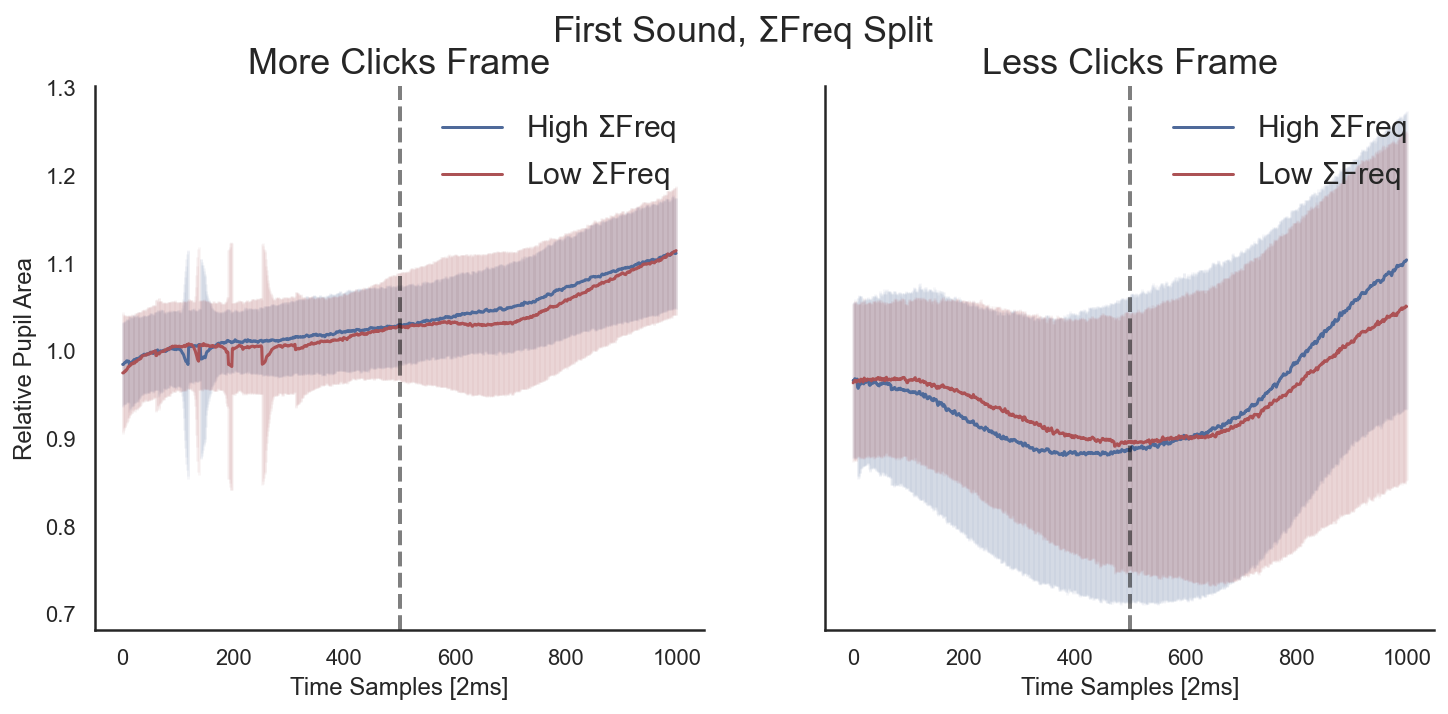

In [100]:
show_frame_pupil_split(pupilFirstSnd,500,choiceFrameAll,baseP,'TotFreqSplit',title = 'First Sound, $\Sigma$Freq Split', labFrame = ['High $\Sigma$Freq','Low $\Sigma$Freq'])

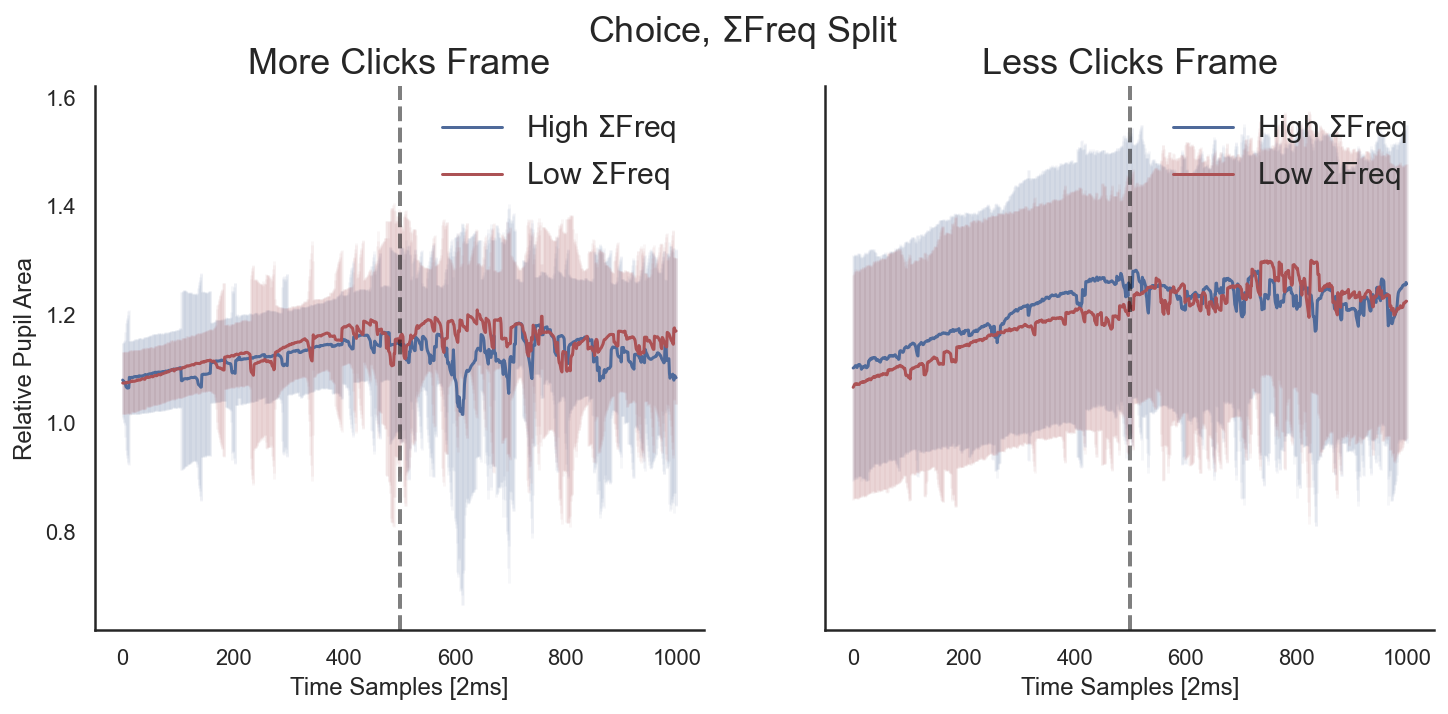

In [101]:
show_frame_pupil_split(pupilChoice,500,choiceFrameAll,baseP,'TotFreqSplit',title = 'Choice, $\Sigma$Freq Split', labFrame = ['High $\Sigma$Freq','Low $\Sigma$Freq'])


## split by Confidence 

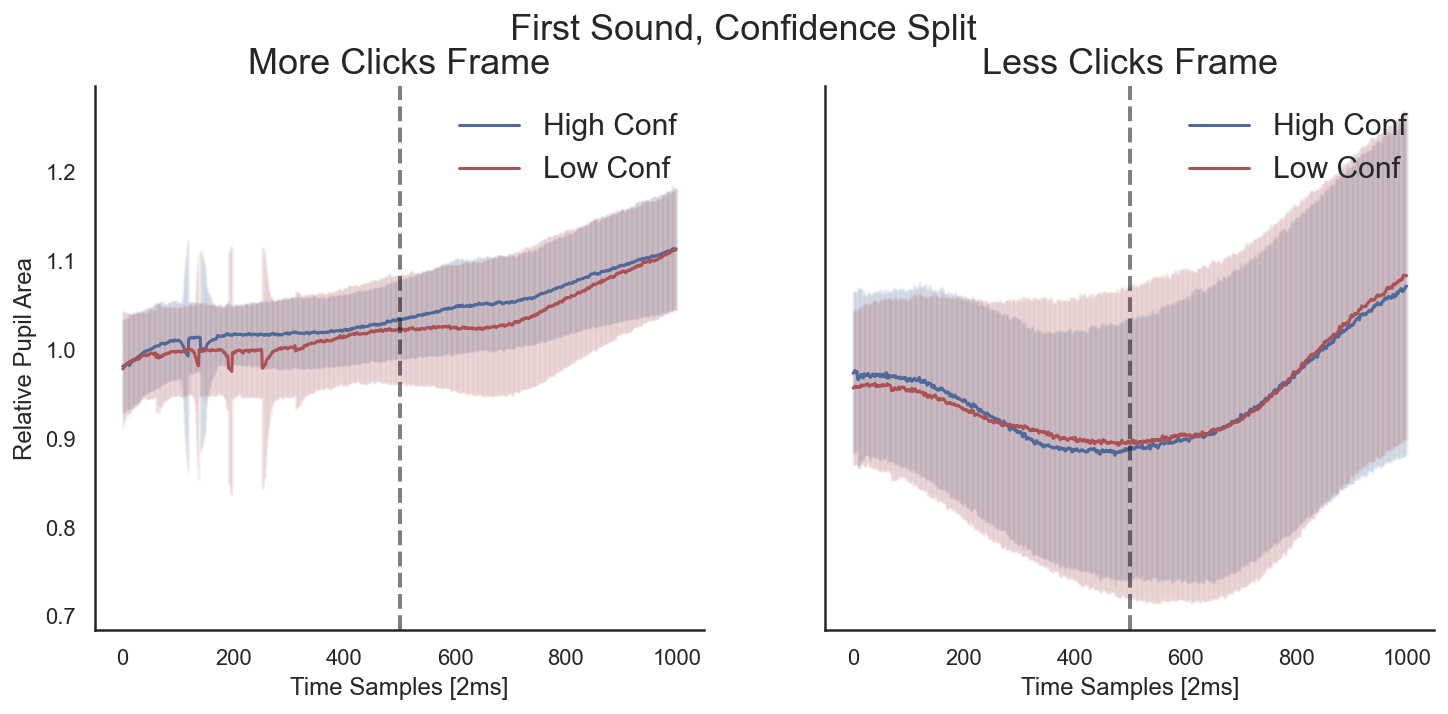

In [102]:
show_frame_pupil_split(pupilFirstSnd,500,choiceFrameAll,baseP,'ConfSplit',title = 'First Sound, Confidence Split', labFrame = ['High Conf','Low Conf'])

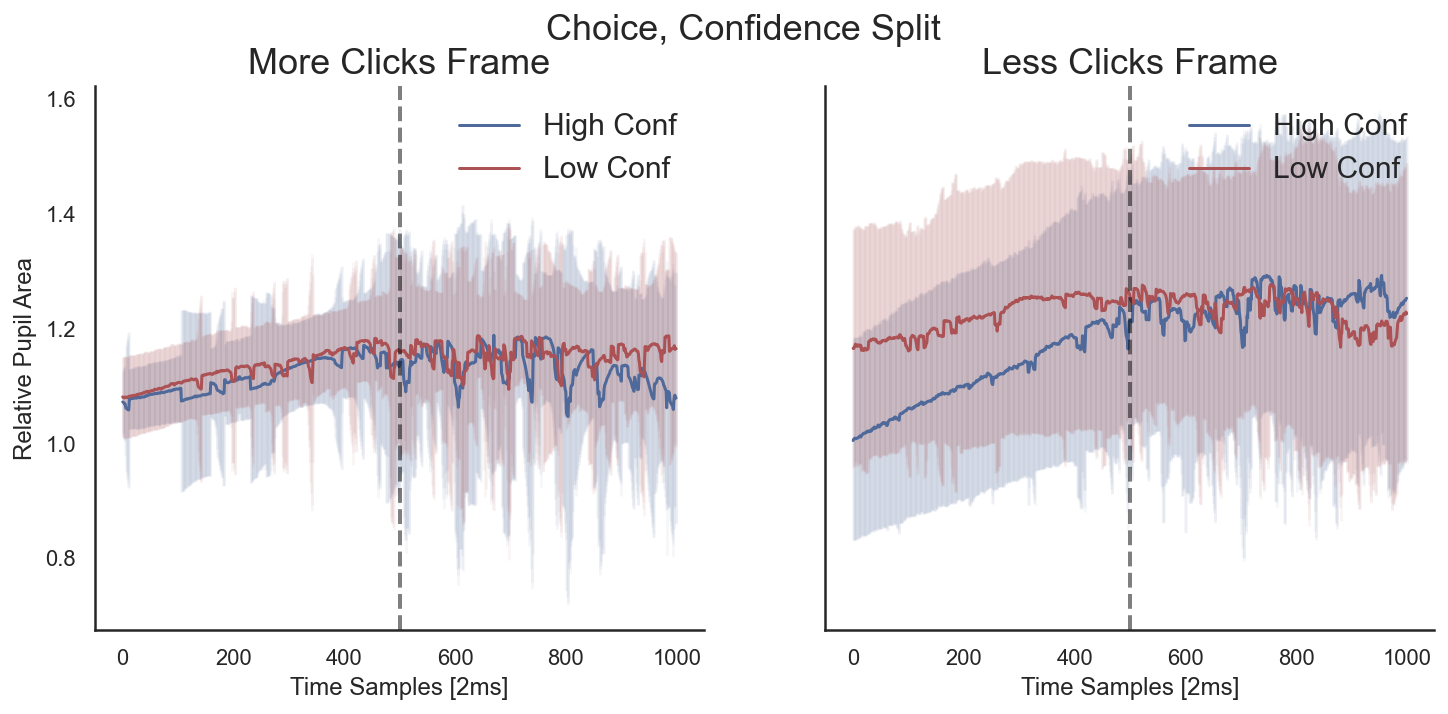

In [103]:
show_frame_pupil_split(pupilChoice,500,choiceFrameAll,baseP,'ConfSplit',title = 'Choice, Confidence Split', labFrame = ['High Conf','Low Conf'])


## split by DFreq 

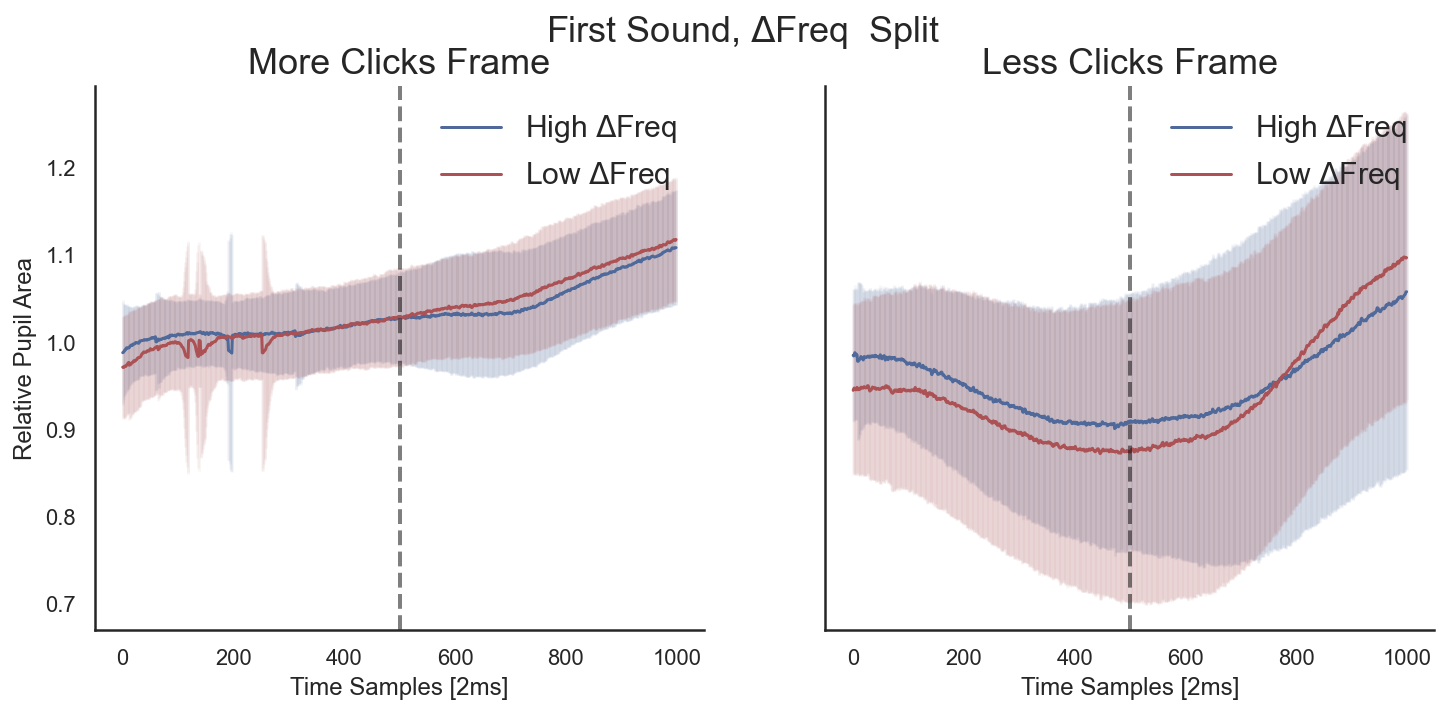

In [104]:
show_frame_pupil_split(pupilFirstSnd,500,choiceFrameAll,baseP,'DFreqSplit',title = 'First Sound, $\Delta$Freq  Split', labFrame = ['High $\Delta$Freq','Low $\Delta$Freq'])

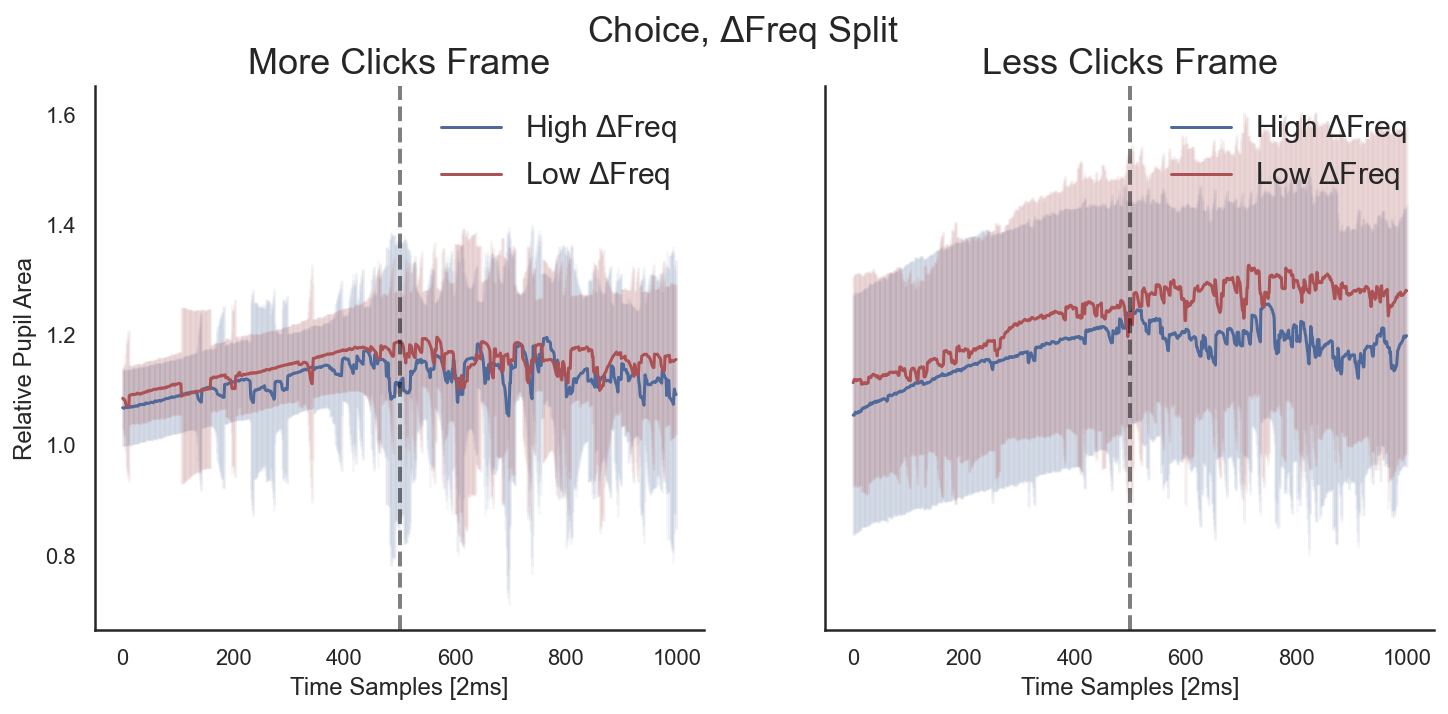

In [105]:
show_frame_pupil_split(pupilChoice,500,choiceFrameAll,baseP,'DFreqSplit',title = 'Choice, $\Delta$Freq Split', labFrame = ['High $\Delta$Freq','Low $\Delta$Freq'])


## -- [end ]

## Import packages

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Populating the interactive namespace from numpy and matplotlib


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [3]:
%%R
library(lme4)
#library(car)
library(optimx)
library(ggplot2)
library(MASS)
#library(broom)
#library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/pupilPEB2021/Code PupilClicks


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser




In [4]:
%%R
# Use in case the libraries are not available in the system
#install.packages('lme4')
#install.packages("car")
#install.packages("ggplot2")
#install.packages("broom")
#install.packages("arm")
#install.packages("ggplot2")
#install.packages("optimx")
#install.packages("multcomp")

NULL


<a id='LoadFunc'></a>
# 2. Defining Functions

#### Taken from Folke et al. (2016)

### Plot distributions

In [5]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(10,10))

    for x in participants:
        # defining the sub figures
     #       sub={}
     #       sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
     #       sns.kdeplot(data.loc[data['part'] == x, var].values, ax = sub['%s' % x], shade=True)
     #       #if rug==True:
     #       #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
     #       sub['%s' % x].set_title('participant %s' % x)
     #       #sub['%s' % x].set_xlim(xlim)

            sns.kdeplot(data.loc[data['part'] == x, var].values, shade=True)

            
            order += 1
    fig.suptitle(title, fontsize = 25)


### Split variable into participantwise quantiles

In [6]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

### Full simple logistic graph

In [7]:
def logisticplot_all (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(6,5))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

    print ('Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)


    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    
    print ('high measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

    
    
    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high,'r--', color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low,'r--', color=modlowcol, linewidth=5, label=modlow, zorder=5)


    #Plotting the binned data
    data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values
    
    # determine the x coordinates
    x_cords= data.groupby('DVBin2')[xaxis].mean()
    
    # determine low y coordinates
    y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine low y standard errors
    test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    
    # determine high y coordinates
    y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values
    
    # determine high y standard errors
    test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    
    # plot the low points
    plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
    # plot low error bars
    plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    # plot the high points
    plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
    # plot high error bars
    plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=28)
    sub.set_xlabel(xlab, fontsize=28)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    leg = sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()
    
    return plt

### Full simple logistic graph (no bins)

In [8]:
def logisticplot_simpl (moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(8,7))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()


    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    # Paula used these dictionaries to store the values of the predictive lines for all the participants.
    logit_low = {}
    logit_high = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

    # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==0)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==0)].index, yaxis])
    logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()
    print ('Low measure coef',clf.coef_)
    
    # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
    # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data.loc[data[(data[moderator]==1)].index, xaxis][:, np.newaxis],
            data.loc[data[(data[moderator]==1)].index, yaxis])
    logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()
    print ('High measure coef',clf.coef_)



    #Plotting the predictive lines
    line_high = sub.plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6)
    line_low = sub.plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5) 
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=20)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-5, 5)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    sub.legend(loc=0, prop={'size':20})
    leg.get_frame().set_linewidth(0.0)

    sns.despine()

### Regression Coefficients Plot

In [9]:
def Coefpresplot(regtable, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0.75, len(regtable.columns) + 0.25)
        YLim = (round_to_5(regtable.loc['CImin', :].min()-0.1), round_to_5(regtable.loc['CImax', :].max()+0.2))
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        YLim = (round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.2), round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color=colourlist[position-1])

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [10]:
def Coefpresplot2(regtable,regtable2, intercept=False, title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)

    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    

    # Set axis limits based on whether to include the intercept or not    
    
       
    
    if intercept == True:
        
        XLim = (0.75, len(regtable.columns) + 0.25)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', :].min()) < round_to_5(regtable2.loc['CImin', :].min()):
            Ymin = round_to_5(regtable.loc['CImin', :].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',:].min()-0.5)
        if round_to_5(regtable.loc['CImax', :].max()) > round_to_5(regtable2.loc['CImax', :].max()):
            Ymax = round_to_5(regtable.loc['CImax', :].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', :].max()+0.5)      

        YLim = (Ymin, Ymax)    
    else:
        XLim = (0.75, len(regtable.columns) - 0.75)
        
        #Determine the Ymax and Ymin for both regresions results
        if round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()) < round_to_5(regtable2.loc['CImin', regtable.columns[1]:].min()):
            Ymin = round_to_5(regtable.loc['CImin', regtable.columns[1]:].min()-0.5)
        else :
            Ymin = round_to_5(regtable2.loc['CImin',regtable.columns[1]:].min()-0.5)
        if round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()) > round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()):
            Ymax = round_to_5(regtable.loc['CImax', regtable.columns[1]:].max()+0.5)
        else :
            Ymax = round_to_5(regtable2.loc['CImax', regtable.columns[1]:].max()+0.5)      
        
        YLim = (Ymin, Ymax)
    
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # both regtable should have the same regressors (and in the same order)

    if intercept == True:
        Coefficients = regtable.columns
 #       Coefficients2 = regtable2.columns
    else:
        Coefficients = regtable.columns[1:]
#        Coefficients2 = regtable2.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = ['#000000'] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.plot(position-0.1, regtable.loc['coefficient', Coefficient], marker='o', ms=8, color='blue',label = 'Like')
        ax.plot(position+0.1, regtable2.loc['coefficient', Coefficient], marker='X', ms=8, color='red', label = 'Dislike')


        ax.errorbar(position-0.1, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='blue')
        ax.errorbar(position+0.1, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='red')
        
        if position == 1:
            ax.legend( prop={'size': 20})

 
    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))

    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Fixed Effects Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()

    sns.despine()
    fig.savefig(str('SavedFigures/'+title +'.png'), dpi = 200 )

In [11]:
def Coefpresplot_bar(regtable, mixtable, intercept=False, barcol='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not    
    if intercept == True:
        XLim = (0, len(regtable.columns) + 1)
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    else:
        XLim = (0, len(regtable.columns) )
        YLim = (round_to_5(np.min(mixtable)-0.2), round_to_5(np.max(mixtable)+0.2))
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    if intercept == True:
        Coefficients = regtable.columns
    else:
        Coefficients = regtable.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    colourlist = [barcol] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        ax.bar(position, regtable.loc['coefficient', Coefficient], width=0.8,color=colourlist[position-1],)
        ax.errorbar(position, regtable.loc['coefficient', Coefficient],
                    yerr=regtable.loc['se', Coefficient]*1.96, lw=2, color='#000000')
        
   # Plot dots for the individual coefficients
    coef_num = len(mixtable)
    for i in range(1,coef_num):
        part_coefs = mixtable[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.5,high=0.5,size=len(part_coefs))/2
        ax.plot(position_parts+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable.columns, rotation=40)
    else: 
        ax.set_xticklabels(regtable.columns[1:], rotation=40)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [12]:
def Coefpresplot_bar2(regtable1, mixtable1,regtable2, mixtable2, intercept=False, barcol1='#000000',barcol2='#000000', title='Regression Coefficients', size='big', ylimits=(), ymultiple=0.5, ticklabsize=25, n_ET_predictors = 0 ):

    # Import itertools so that we can iterate through the colours
    import itertools
    
    # Import locators so that we can tidy up the yaxis
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    
    # rounding function to get edges to even 0.5 values
    def round_to(n, precision):
        correction = 0.5 if n >= 0 else -0.5
        return int( n/precision+correction ) * precision

    def round_to_5(n):
        return round_to(n, 0.5)
            
    # Set seaborn style for the plot
    sns.set(style='white')
    
    # Generate the figure
    if size=='big':
        fig = plt.figure(figsize=[20,8])
    elif size=='long':
        fig = plt.figure(figsize=[20,4])
    elif size=='narrow':
        fig = plt.figure(figsize=[10,4])
        
    fig.suptitle(title, fontsize=20)
    gs = GridSpec(1,1,bottom=0.18,left=0.18,right=0.82)
    ax = fig.add_subplot(gs[0,0])
    
    # Set axis limits based on whether to include the intercept or not   
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients
    if intercept == True:
        XLim = (0, len(regtable1.columns) + 2)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    else:
        XLim = (0, len(regtable1.columns) +1)
        YLim = (round_to_5(np.min([mixtable1,mixtable2]))-0.2, round_to_5(np.max([mixtable1,mixtable2]))+0.2)
    if ylimits != ():
        YLim = ylimits
    ax.set_xlim(XLim)
    ax.set_ylim(YLim)
    
    # Draw a line through the 0-value on the y-axis
    line = ax.plot(XLim, [0, 0], color='black', ls='--', alpha = 0.5, lw=3)
    
    
    # If intercept is true, plot the coefficient for the intercept
    # Assumuing that regtable1 and regtable2 have exactly the same number of coefficients

    if intercept == True:
        Coefficients = regtable1.columns
    else:
        if len(regtable1.columns)<len(mixtable1):
            Coefficients = regtable1.columns
        else:
            Coefficients = regtable1.columns[1:]
        
    # Determine the colours for the coefficients based on the n_ET_variable
    n_predictors = len(Coefficients)
    n_non_ET_predictors = n_predictors - n_ET_predictors
    
    # Color for conditions 1 and 2
    colourlist1 = [barcol1] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    colourlist2 = [barcol2] * n_non_ET_predictors + ['#03719c'] * n_ET_predictors
    
        
    # Plot all the coefficients with 95% CI
    position = 0
    for Coefficient in Coefficients:
        position += 1
        # Plot condition 1
        ax.bar(position-0.2, regtable1.loc['coefficient', Coefficient], width=0.4,color=colourlist1[position-1],)
        ax.errorbar(position-0.2, regtable1.loc['coefficient', Coefficient],
                    yerr=regtable1.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        # Plot condition 2
        ax.bar(position+0.2, regtable2.loc['coefficient', Coefficient], width=0.4,color=colourlist2[position-1],)
        ax.errorbar(position+0.2, regtable2.loc['coefficient', Coefficient],
                    yerr=regtable2.loc['se', Coefficient]*1.96, lw=2, color='#000000')

        
   # Plot dots for the individual coefficients
    # Assumuing that mixtable1 and mixtable2 have exactly the same number of elements 
    
    if intercept == True:
        coef_num = range(0,len(mixtable1)) 
    else:
        coef_num = range(1,len(mixtable1))
        
    for i in coef_num:
        # Plot dots condition 1
        part_coefs = mixtable1[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts-0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")

        # Plot dots condition 1
        part_coefs = mixtable2[i]
        position_parts= np.full(len(part_coefs), i, dtype=int)
        jittr = np.random.uniform(low=-0.2,high=0.2,size=len(part_coefs))/2
        ax.plot(position_parts+0.2+jittr, part_coefs, marker='o', ms=8, color='#000000',alpha=0.3,linestyle="None")
        

    # Setting the x-axis major tick's location
    ax.set_xticks(range(1, position+1))
    
    # set the y-axis major tick position
    ax.yaxis.set_major_locator(MultipleLocator(ymultiple))


    # Setting the x-axis major tick's label
    if intercept == True:
        ax.set_xticklabels(regtable1.columns, rotation=0)        
    else:
        if len(regtable1.columns)<len(mixtable1):
            ax.set_xticklabels(regtable1.columns, rotation=0)
        else:    
            ax.set_xticklabels(regtable1.columns[1:], rotation=0)
    
    ax.tick_params(axis='both', which='major', labelsize=ticklabsize)
    ax.set_ylabel('Regression Coefficients', fontsize=18)
    
    # Autoformats the ticklabels for the xaxis
    fig.autofmt_xdate()
    
    sns.despine()

In [13]:
def regtable(fix, fix_se, names):
    fixed_betas = DF(np.array(fix)); fixed_betas = fixed_betas.transpose(); fixed_betas.columns = names
    fixed_betas.loc[1] = np.array(fix_se)
    fixed_betas.loc[2] = fixed_betas.loc[0] - (fixed_betas.loc[1]*1.96)
    fixed_betas.loc[3] = fixed_betas.loc[0] + (fixed_betas.loc[1]*1.96)
    fixed_betas.index = ['coefficient', 'se', 'CImin', 'CImax']
    return fixed_betas

In [14]:
def correl_plot2 (data_all,data_all2,x_variable,y_variable,color1 = '#000000',color2 = '#000000',x_varlabel = "x_variable" ,y_varlabel = "y_variable", data_label =('Correct', 'Error'), title = "Pretty PLot"):

    f = plt.figure(figsize=(5, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_all, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color1, scatter_kws={'s':70,'alpha':0.3},)
    ax = sns.regplot(data=data_all2, x= x_variable, y=y_variable, fit_reg=False, ci=0, color= color2, scatter_kws={'s':70,'alpha':0.3})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)

    # For data 1
    x=data_all[x_variable]
    y=data_all[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p1 = ax.plot(future, future_fit, color=color1, lw=3, label = data_label[0])
    
    results = pearsonr(data_all[x_variable], data_all[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    # For data 2
    x=data_all2[x_variable]
    y=data_all2[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    p2 = ax.plot(future, future_fit, color=color2, lw=3,label = data_label[1] )
    sns.despine()
    #ax.set_title(title)    
    results = pearsonr(data_all2[x_variable], data_all2[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    ax.legend()
    ax.set_title(title)

    #plt.legend((p1, p2), data_label )
    
    plt.show()

In [15]:
def logisticplot_all_sbj_slope(moderator, modhigh, modlow, data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modhighcol='#000000', modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
#inputs example   
#logisticplot_all('DDTSplit', 'High DDT', 'Low DDT', data=data_expL, xaxis='zDVal', yaxis='Choice', ylab='P(Right Item)', xlab='Difference in Value (DVal)',
#                 modhighcol='#4F6A9A', modlowcol='#B5C8E9', title='empty', parvar='Part')


    # Counter to know where to plot the particpant
    order = 1
    # Initialize the array to store coefs
    coefs_all = []

   # a list of all the participants in the dataset
    participants = data.loc[:, 'part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(5,5))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/5+1), 5, order)
            
            
            # Extract dataframe for that particualt participant
            data_in = data.loc[data['part'] == x]
           
            sns.set(font_scale=1.5, style='white')
           
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            #sub = plt.subplot()
            sub['%s' % x].set_title('part. %s' % x, fontsize = 50 )


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            # Paula used these dictionaries to store the values of the predictive lines for all the participants.
            logit_low = {}
            logit_high = {}
            logit_all = {}

            
            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

            # fitting the predictive logistic model for the low_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data[moderator]==0)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data[moderator]==0)].index, yaxis])
            logit_low = model(X_test*clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x , ' Low measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            low_coef = clf.coef_
            low_intercept = clf.intercept_
            
            # fitting the predictive logistic model for the high_confidence trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in.loc[data_in[(data_in[moderator]==1)].index, xaxis][:, np.newaxis],
                    data_in.loc[data_in[(data_in[moderator]==1)].index, yaxis])
            logit_high = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            high_coef = clf.coef_
            high_intercept = clf.intercept_
            
            
            # fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
            
            all_coef = clf.coef_
            all_intercept = clf.intercept_
    
            #Plotting the predictive lines
            line_high = sub['%s' % x].plot(X_test, logit_high, color=modhighcol, linewidth=5, label=modhigh, zorder=6,linestyle='-')
            line_low = sub['%s' % x].plot(X_test, logit_low, color=modlowcol, linewidth=5, label=modlow, zorder=5,linestyle='-')
            line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='-')
            
            coefs_part= np.column_stack((x,low_coef,low_intercept,high_coef,high_intercept,all_coef,all_intercept))
            coefs_all.append(coefs_part[0])

            
            #Plotting the binned data
            data_in['DVBin2'] = data_in.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values[0]

            # determine the x coordinates
            x_cords= data.groupby('DVBin2')[xaxis].mean()

            # determine low y coordinates
            y_cords_low = data_in.loc[(data_in[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

            # determine low y standard errors
            test = pd.DataFrame(data_in.loc[(data_in[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
            # determine high y coordinates
            y_cords_high = data_in.loc[(data_in[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

            # determine high y standard errors
            test2 = pd.DataFrame(data_in.loc[data_in[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
            y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

            # plot the low points
            plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
            # plot low error bars
            plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

            # plot the high points
            plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
            # plot high error bars
            plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
           # sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=30)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
        

            sns.despine()
            
            order += 1
    
    custom_lines = [Line2D([0], [0], color=modhighcol, lw=4),
                Line2D([0], [0], color=modlowcol, lw=4)]
    fig.legend(custom_lines, [modhigh, modlow],loc = 4,fontsize=50)       

    fig.text(0.5, -0.01, xlab, ha='center',fontsize = 70)
    fig.text(-0.01, 0.5, ylab, va='center', rotation='vertical',fontsize = 70)
    
    coefs_all = pd.DataFrame(coefs_all,columns=['Participant','Low Coef','Low Intercept','High Coef','High Intercept','All Coef','All Intercept'])
    return coefs_all

In [16]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [17]:
def splitBy(data_exp1, Splits_headers = ['ConfSplit', 'GSFMedSplit','DDTMedSplit'],Splits_variables = ['Conf', 'tGSF','tDDT']):
    
    median_matrix=[]
    median_matrix_aux=[]
    median_matrix_aux_cond=[]
    Split_cols = []
    
    for h in range(len(Splits_variables)):
        median_matrix=[]
        for i in unique(data_exp1["part"]):
            median_matrix_aux=[]
    
            for j in unique(data_exp1["frame"]):
                #median_matrix_aux_cond=[]
    
                #Extract data by participant and BlockCond (1: Like, 2: Dislike)
                Splitdata = data_exp1.loc[data_exp1['part'] == i]
                Splitdata = Splitdata.loc[Splitdata['frame'] == j]
                
                # Select the column to split
                Splitdata = Splitdata.loc[:,['TRIAL_N_LIVE',Splits_variables[h]]]
                SplitSort = Splitdata.values
                # Sort for confidence column
                SplitSort = SplitSort[np.argsort(SplitSort[:, 1])]
                #print(SplitSort)
                lenPart = len(Splitdata)
                #print(lenPart)
                # Generate column with median order
                median_low = [0] * int (lenPart/2)
    
                if len(SplitSort) != 2*len(median_low):
                    median_high=  [1] * int(len(SplitSort)-len(median_low))
                else: median_high = [1] * int (lenPart/2)
            
                median_split_order = median_low + median_high
                #Attach split median order column (1 and 0)
                median_aux= np.column_stack((SplitSort,median_split_order))
                #Sort back to trial number
                SplitSorted = median_aux[np.argsort(median_aux[:, 0])]
                #print(len(SplitSorted))
                
                for kk in range(len(SplitSorted)): 
                    if len(median_matrix_aux) == 0 :
                        median_matrix_aux = SplitSorted[0]
                    else:
                        median_matrix_aux = np.vstack([median_matrix_aux, SplitSorted[kk]])
            
            
            #print(["participant "+ str(i)+ " done"])
            # sort after adding both conditions    
            median_matrix_aux = median_matrix_aux[np.argsort(median_matrix_aux[:, 0])]
            
            #Extract only the column with the median split information
            median_matrix_aux = median_matrix_aux[:,2]
            
            #append to median matrix for the participants
            for k in range(len(median_matrix_aux)):    
                median_matrix.append(median_matrix_aux [k])
        
        median_matrix = pd.DataFrame(median_matrix,columns=[Splits_headers[h]])
        #print(len (median_matrix))
        #add new column (new split variable columns) to the split matrix
        if  h == 0:
            Split_cols = median_matrix
        else:
            Split_cols = pd.concat([Split_cols,median_matrix ],axis =1)   
    
    return Split_cols

In [18]:
# Add asterisk
def add_star(RT_like, RT_dislike):
    x1, x2 = 0, 1   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
    
    
# Add asterisk
def add_star1(RT_like, RT_dislike, p):
    
    if p<0.001:
        star_text = '***'
    elif p<0.01:
        star_text = '**'
    elif p<0.05:
        star_text = '*'
        
    x1, x2 = 1, 2   
    y_max = max([np.max(RT_like), np.max(RT_dislike)])
    y, h, col = y_max + y_max/50, y_max/50, 'k'
    plt.plot( [x1+0.25, x2-0.25], [ y+h, y+h], lw=1.5, c=col)
    plt.text((x1+x2)*.5, y+h, star_text, ha='center', va='bottom', color=col)

In [19]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value



def add_violin(all_arr):
    parts = plt.violinplot( all_arr, showmeans=False, showextrema=False, showmedians=False)
    for i, face in enumerate(parts['bodies']):
        face.set_hatch('//')
        face.set_facecolor(colr_dict[i])
        face.set_edgecolor('white')
        face.set_alpha(1)
  #  parts2 = plt.violinplot( all_arr
   #                         , showmeans=False, showextrema=False, showmedians=False)
  #  for i, face in enumerate(parts2['bodies']):
       # face.set_hatch('//')
       # face.set_facecolor('None')
   #     face.set_alpha(1)

    quartile1, medians, quartile3 = np.percentile(all_arr, [25, 50, 75], axis=1)
    whiskers = np.array([
        adjacent_values(sorted_array, q1, q3) 
        for sorted_array, q1, q3 in zip(all_arr, quartile1, quartile3)])
    whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]

    inds = np.arange(1, len(medians)+1)
    plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=3,alpha = 0.7)
    plt.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1,alpha = 0.7)
    plt.scatter(inds, medians, marker='o', color='white', s=2, zorder=2,alpha = 1)    

In [20]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, parvar].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data[parvar] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()